# **Project Name**    - Facial Emotion Recognition Using Deep Learning



##### **Project Type**    - Deep Learning for Computer Vision
##### **Contribution**    - Individual
##### **Team Member 1 -** Rajesh Kumar Patel

## **GitHub Link -** https://github.com/Rajesh1505/Capstone_Project_Deep_Learning_for_Computer_Vision.git

# Project Title:
**DeepFER: Facial Emotion Recognition Using Deep Learning**

## Overview

DeepFER: Facial Emotion Recognition Using Deep Learning aims to develop a robust and efficient system for recognizing emotions from facial expressions using advanced deep learning techniques. This project leverages Convolutional Neural Networks (CNNs) and Transfer Learning to accurately classify emotions such as happiness, sadness, anger, surprise, and more from images of human faces. The system will be trained on a diverse dataset of facial images, employing data augmentation and fine-tuning methods to enhance its performance. By integrating state-of-the-art computer vision algorithms and neural network architectures, DeepFER seeks to achieve high accuracy and real-time processing capabilities. The ultimate goal is to create a versatile tool that can be applied in various fields, including human-computer interaction, mental health monitoring, and customer service, enhancing the way machines understand and respond to human emotions.

## Project Background

Customer satisfaction in the e-commerce sector is a pivotal metric that influences loyalty, repeat business, and word-of-mouth marketing. Traditionally, companies have relied on direct surveys to gauge customer satisfaction, which can be time-consuming and may not always capture the full spectrum of customer experiences. With the advent of deep learning, it's now possible to predict customer satisfaction scores in real-time, offering a granular view of service performance and identifying areas for immediate improvement.

In recent years, the field of facial emotion recognition has gained significant attention due to its wide range of applications in various domains, including mental health monitoring, human-computer interaction, customer service, and security. Emotion recognition from facial expressions is a challenging task, as it involves accurately identifying subtle differences in facial features corresponding to different emotional states. Traditional methods relied heavily on handcrafted features and rule-based approaches, which often lacked the ability to generalize across diverse datasets and real-world scenarios.

The advent of deep learning, particularly Convolutional Neural Networks (CNNs), has revolutionized the way facial emotion recognition systems are developed. CNNs have demonstrated exceptional performance in image classification tasks by automatically learning hierarchical feature representations from raw data.

This project, DeepFER: Facial Emotion Recognition Using Deep Learning, aims to harness the power of CNNs and Transfer Learning to build a robust and efficient facial emotion recognition system. By training the model on large, annotated datasets and employing advanced techniques such as data augmentation and fine-tuning, DeepFER aspires to achieve high accuracy and real-time processing capabilities.

The motivation behind this project stems from the growing need for automated systems that can understand and respond to human emotions effectively. Such systems can significantly enhance user experiences in various applications, from interactive virtual assistants to personalized mental health interventions. DeepFER seeks to bridge the gap between advanced AI techniques and practical emotion recognition applications, paving the way for more intuitive and empathetic machine interactions with humans.

## Dataset Overview

- **Dataset Composition:**
  - Contains images categorized into seven distinct emotion classes: angry, sad, happy, fear, neutral, disgust, and surprise.
- **Emotion Classes:**
  - **Angry:** Images depicting expressions of anger.
  - **Sad:** Images depicting expressions of sadness.
  - **Happy:** Images depicting expressions of happiness.
  - **Fear:** Images depicting expressions of fear.
  - **Neutral:** Images depicting neutral, non-expressive faces.
  - **Disgust:** Images depicting expressions of disgust.
  - **Surprise:** Images depicting expressions of surprise.

- **Image Characteristics:**
  - High-quality facial images with diverse backgrounds and lighting conditions.
  - Includes both posed and spontaneous expressions to ensure robustness.
- **Data Augmentation:**
  - Techniques such as rotation, scaling, and flipping applied to increase dataset variability and enhance model generalization.
- **Dataset Annotations:**
  - Each image is labeled with its corresponding emotion class.
- **Data Source:**
  - Collected from publicly available facial expression databases and crowd-sourced contributions.
- **Usage:**
  - Used for training, validation, and testing phases in the emotion recognition model development.
- **Purpose:**
  - To train and evaluate the DeepFER model for accurate and real-time facial emotion recognition across diverse scenarios.


---


## Project Goal

The primary goal of **DeepFER: Facial Emotion Recognition Using Deep Learning** is to develop an advanced and efficient system capable of accurately identifying and classifying human emotions from facial expressions in real-time. By leveraging state-of-the-art Convolutional Neural Networks (CNNs) and Transfer Learning techniques, this project aims to create a robust model that can handle the inherent variability in facial expressions and diverse image conditions. The system will be trained on a comprehensive dataset featuring seven distinct emotions: angry, sad, happy, fear, neutral, disgust, and surprise. The ultimate objective is to achieve high accuracy and reliability, making DeepFER suitable for applications in human-computer interaction, mental health monitoring, customer service, and beyond. Through this project, we aim to bridge the gap between cutting-edge AI research and practical emotion recognition applications, contributing to more empathetic and responsive machine interactions with humans.

# ***Let's Begin !***

## ***Know Your Data***

### Import Libraries

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import os
from pathlib import Path
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

### Data Loading

In [ ]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/AB/spec/M5/project/"

!unzip "/content/drive/MyDrive/Colab Notebooks/AB/spec/M5/project/Face_Emotion_Recognition_Dataset.zip" > /dev/null

### Data First View

In [ ]:
train_dir = "/content/images/images/train"
val_dir = "/content/images/images/validation"

all_class_names = os.listdir(train_dir)
print(all_class_names)

['angry', 'surprise', 'happy', 'disgust', 'fear', 'neutral', 'sad']


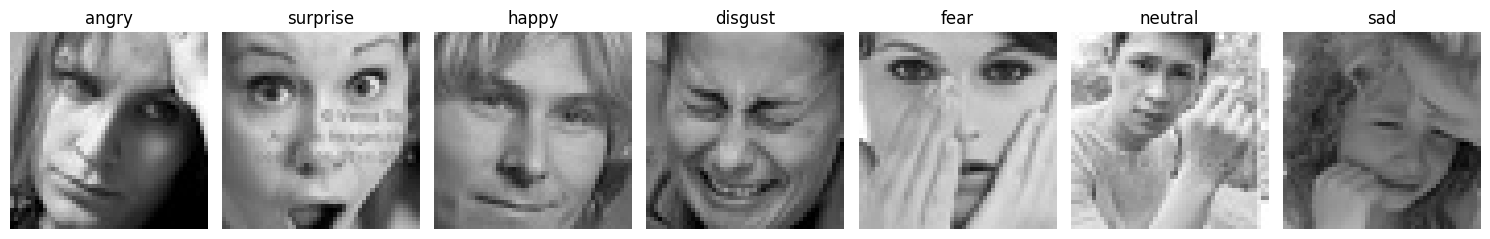

In [ ]:
# display one image from each class
from fastai.vision.core import PILImage

# Convert train_dir to a Path object
train_dir_ = Path(train_dir)
fig, axes = plt.subplots(1, len(all_class_names), figsize=(15, 5))

for ax, cls in zip(axes, all_class_names):
    class_path = train_dir_ / cls
    img_path = list(class_path.glob("*"))[0]

    img = PILImage.create(img_path)
    ax.imshow(img)
    ax.set_title(cls)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Function to count images in each class and calculate percentages
def count_images_with_percentage(directory):
    class_counts = {}
    total_images = 0

    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            count = len(os.listdir(class_path))
            class_counts[class_name] = count
            total_images += count

    class_percentages = {class_name: (count / total_images) * 100 for class_name, count in class_counts.items()}
    return class_counts, class_percentages, total_images


train_class_counts, train_class_percentages, train_total = count_images_with_percentage(train_dir)
val_class_counts, val_class_percentages, val_total = count_images_with_percentage(val_dir)

print("Training Set:")
print(f"Total images: {train_total}")
for class_name in sorted(train_class_counts):
    print(f"{class_name}: {train_class_counts[class_name]} images ({train_class_percentages[class_name]:.2f}%)")

print("\nValidation Set:")
print(f"Total images: {val_total}")
for class_name in sorted(val_class_counts):
    print(f"{class_name}: {val_class_counts[class_name]} images ({val_class_percentages[class_name]:.2f}%)")


Training Set:
Total images: 28821
angry: 3993 images (13.85%)
disgust: 436 images (1.51%)
fear: 4103 images (14.24%)
happy: 7164 images (24.86%)
neutral: 4982 images (17.29%)
sad: 4938 images (17.13%)
surprise: 3205 images (11.12%)

Validation Set:
Total images: 7066
angry: 960 images (13.59%)
disgust: 111 images (1.57%)
fear: 1018 images (14.41%)
happy: 1825 images (25.83%)
neutral: 1216 images (17.21%)
sad: 1139 images (16.12%)
surprise: 797 images (11.28%)


In [ ]:
from PIL import Image

image_dir = "/content/images/images/train"

# Function to get image sizes
def get_image_sizes(directory):
    image_sizes = []
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                try:
                    with Image.open(image_path) as img:
                        image_sizes.append(img.size)  # (width, height)
                except Exception as e:
                    print(f"Error reading {image_path}: {e}")
    return image_sizes


sizes = get_image_sizes(image_dir)


print(f"Total images checked: {len(sizes)}")
print(f"First 5 image sizes: {sizes[:5]}")


Total images checked: 28821
First 5 image sizes: [(48, 48), (48, 48), (48, 48), (48, 48), (48, 48)]


In [ ]:
# Count unique image sizes
size_counts = Counter(sizes)
print("All image size distribution:")
for size, count in size_counts.items():
    print(f"Size {size}: {count} images")


All image size distribution:
Size (48, 48): 28821 images


#### Summary of Data:
- **Classes**: The dataset contains 7 classes: `['angry', 'surprise', 'happy', 'disgust', 'fear', 'neutral', 'sad']`.
- **Total Train Images**: 28,821 images.
- **Image Size**: All images are uniformly sized at **48x48 pixels**.
- **Image Mode**: Grayscale (`L`), meaning each image has a single channel (shape: `48x48x1`).
- **Class Distribution**:
  - The `happy` class has the highest representation, comprising approximately 25% of the dataset.
  - The `disgust` class has the lowest representation, contributing around 1.5% of the dataset.

This dataset is well-suited for tasks such as facial emotion recognition and is already preprocessed to a consistent size and format.

## ***Model Implementation***

### Model - 1

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Data paths and details
train_images_path = "/content/images/images/train"
val_images_path = "/content/images/images/validation"

In [ ]:
# Define labels
all_class_names = ['angry', 'surprise', 'happy', 'disgust', 'fear', 'neutral', 'sad']
class_to_label = {class_name: idx for idx, class_name in enumerate(all_class_names)}

In [ ]:
# Image processing function
def process_image(img_path):
    img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
    img = image.img_to_array(img)
    img = img / 255.0  # Normalize to [0, 1]
    return img

# Load and preprocess images
def load_data(image_dir, class_to_label):
    data = []
    labels = []
    for class_name, label in class_to_label.items():
        class_dir = os.path.join(image_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            try:
                processed_img = process_image(img_path)
                data.append(processed_img)
                labels.append(label)
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")
    return np.array(data), np.array(labels)


In [ ]:
# Load training and validation data
train_images, train_labels = load_data(train_images_path, class_to_label)
val_images, val_labels = load_data(val_images_path, class_to_label)

# Reshape data to include the channel dimension
train_images = train_images.reshape(-1, 48, 48, 1)
val_images = val_images.reshape(-1, 48, 48, 1)

In [ ]:
# Model Building
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes for emotions
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,659,271 (6.33 MB)

 Trainable params: 1,659,271 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=11, batch_size=32, callbacks=[early_stopping])


Epoch 1/11
901/901 ━━━━━━━━━━━━━━━━━━━━ 97s 106ms/step - accuracy: 0.2589 - loss: 1.8022 - val_accuracy: 0.3909 - val_loss: 1.6159
Epoch 2/11
901/901 ━━━━━━━━━━━━━━━━━━━━ 144s 109ms/step - accuracy: 0.3776 - loss: 1.6125 - val_accuracy: 0.4190 - val_loss: 1.5318
Epoch 3/11
901/901 ━━━━━━━━━━━━━━━━━━━━ 99s 110ms/step - accuracy: 0.4142 - loss: 1.5291 - val_accuracy: 0.4416 - val_loss: 1.4755
Epoch 4/11
901/901 ━━━━━━━━━━━━━━━━━━━━ 140s 108ms/step - accuracy: 0.4267 - loss: 1.4871 - val_accuracy: 0.4558 - val_loss: 1.4331
Epoch 5/11
901/901 ━━━━━━━━━━━━━━━━━━━━ 100s 110ms/step - accuracy: 0.4543 - loss: 1.4371 - val_accuracy: 0.4649 - val_loss: 1.4035
Epoch 6/11
901/901 ━━━━━━━━━━━━━━━━━━━━ 139s 108ms/step - accuracy: 0.4737 - loss: 1.3997 - val_accuracy: 0.4734 - val_loss: 1.3796
Epoch 7/11
901/901 ━━━━━━━━━━━━━━━━━━━━ 100s 111ms/step - accuracy: 0.4796 - loss: 1.3708 - val_accuracy: 0.4836 - val_loss: 1.3723
Epoch 8/11
901/901 ━━━━━━━━━━━━━━━━━━━━ 97s 107ms/step - accuracy: 0.4893 - lo

In [ ]:
# Save the model
model.save(folder_path+'deep_fer_model_1.keras')

### Model - 2

In [ ]:
# Import necessary libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix

In [ ]:
# Folder paths
train_dir = "/content/images/images/train"
test_dir = "/content/images/images/validation"

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
# Data Generators
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="training"
)

validation_generator = validation_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation"
)

Found 23060 images belonging to 7 classes.
Found 5761 images belonging to 7 classes.


In [ ]:
# Get class indices and labels
class_indices = train_generator.class_indices
labels = {v: k for k, v in class_indices.items()}
print("Class Indices:", class_indices)
print("Labels:", labels)

Class Indices: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Labels: {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [ ]:
# Define CNN Model
inputs = Input(shape=(48, 48, 1), name='input_layer')
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
outputs = Dense(7, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)


model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 44, 44, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 20, 20, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,277,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,373,447 (12.87 MB)

 Trainable params: 3,372,487 (12.87 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'] )

In [ ]:
epochs = 15
batch_size = 64

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.8, min_lr=1e-7, verbose=1 )

checkpoint_callback = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1 )

callbacks_list = [learning_rate_reduction, checkpoint_callback]

# Train the Model
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator, callbacks=callbacks_list )

Epoch 1/15
360/361 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.2061 - loss: 2.7660
Epoch 1: val_accuracy improved from -inf to 0.19024, saving model to best_model.keras
361/361 ━━━━━━━━━━━━━━━━━━━━ 47s 96ms/step - accuracy: 0.2062 - loss: 2.7650 - val_accuracy: 0.1902 - val_loss: 2.7109 - learning_rate: 1.0000e-04
Epoch 2/15
360/361 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2743 - loss: 2.2782
Epoch 2: val_accuracy improved from 0.19024 to 0.39143, saving model to best_model.keras
361/361 ━━━━━━━━━━━━━━━━━━━━ 62s 69ms/step - accuracy: 0.2744 - loss: 2.2780 - val_accuracy: 0.3914 - val_loss: 1.6742 - learning_rate: 1.0000e-04
Epoch 3/15
360/361 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2961 - loss: 2.1321
Epoch 3: val_accuracy improved from 0.39143 to 0.41017, saving model to best_model.keras
361/361 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.2962 - loss: 2.1319 - val_accuracy: 0.4102 - val_loss: 1.6634 - learning_rate: 1.0000e-04
Epoch 4/15
360/361 ━━━━━━━━━━━━━━━

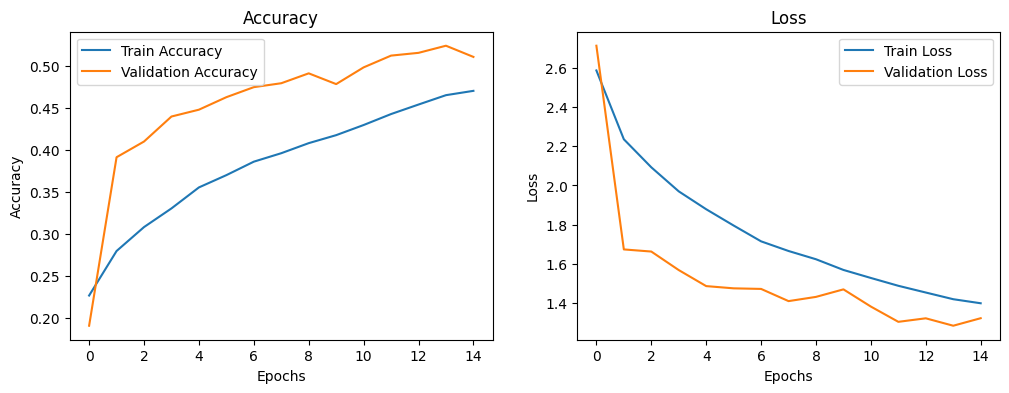

In [ ]:
# Plot Training and Validation Accuracy and Loss
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()
plt.show()

In [ ]:
# Evaluate the Model
train_loss, train_accuracy = model.evaluate(train_generator)
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Training Accuracy: {train_accuracy:.1%}")
print(f"Validation Accuracy: {val_accuracy:.1%}")

361/361 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.5180 - loss: 1.3097
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5188 - loss: 1.3089
Training Accuracy: 50.4%
Validation Accuracy: 51.1%


In [ ]:
# Save the model
model.save(folder_path+'deep_fer_model_2.keras')

91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step


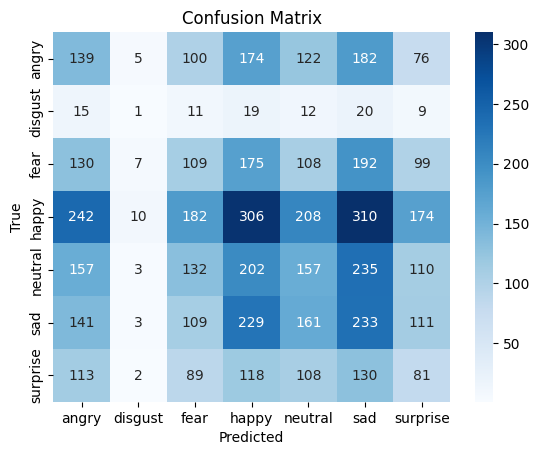

In [ ]:
# Confusion Matrix
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(labels.values()),
            yticklabels=list(labels.values()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

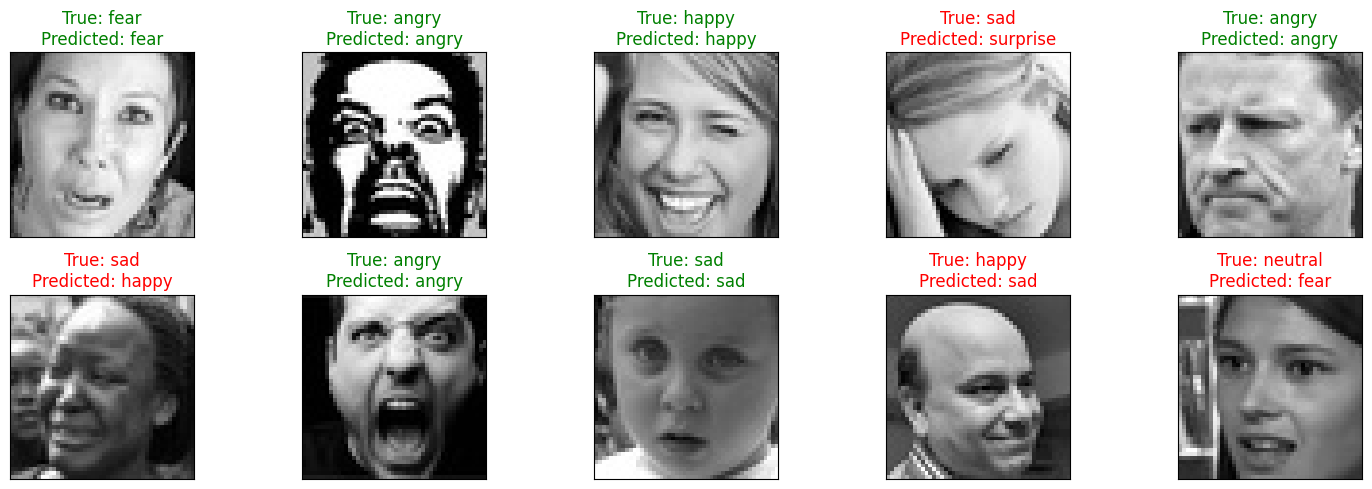

In [ ]:
# Testing Random Validation Data
batch_size = validation_generator.batch_size

random_batch = np.random.randint(0, len(validation_generator) - 1)
random_img_indices = np.random.randint(0, batch_size, 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    random_img = validation_generator[random_batch][0][random_img_indices[i]]
    random_img_label = np.argmax(validation_generator[random_batch][1][random_img_indices[i]])

    model_prediction = np.argmax(model.predict(tf.expand_dims(random_img, axis=0), verbose=0))
    ax.imshow(random_img.squeeze(), cmap='gray')
    if labels[random_img_label] == labels[model_prediction]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {labels[random_img_label]}\nPredicted: {labels[model_prediction]}", color=color)

plt.tight_layout()
plt.show()

### Model - 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

In [ ]:
train_dir = "/content/images/images/train"
test_dir = "/content/images/images/validation"

img_shape = 48
batch_size = 32

In [ ]:
# Data Augmentation
train_preprocessor = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=10,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_preprocessor = ImageDataGenerator(rescale=1/255.0)

In [ ]:
# Load training and test data
train_data = train_preprocessor.flow_from_directory(
    train_dir,
    class_mode="categorical",
    target_size=(img_shape, img_shape),
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_data = test_preprocessor.flow_from_directory(
    test_dir,
    class_mode="categorical",
    target_size=(img_shape, img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
# Load and fine-tune ResNet50V2
resnet50v2 = ResNet50V2(
    input_shape=(img_shape, img_shape, 3),
    include_top=False,
    weights='imagenet'
)
resnet50v2.trainable = True

for layer in resnet50v2.layers[:-50]:
    layer.trainable = False

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Define the custom model
def create_resnet50v2_model():
    model = Sequential([
        resnet50v2,
        Dropout(0.25),
        BatchNormalization(),
        Flatten(),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(7, activation='softmax')
    ])
    return model

resnet50v2_model = create_resnet50v2_model()
resnet50v2_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
resnet50v2_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ (None, 2, 2, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 2048)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2, 2, 2048)          │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         524,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,098,055 (91.93 MB)

 Trainable params: 16,881,287 (64.40 MB)

 Non-trainable params: 7,216,768 (27.53 MB)

In [ ]:
checkpoint_path = "ResNet50V2_best_model.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)

callbacks = [checkpoint, early_stopping, reduce_lr]

# Train the model
steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

resnet50v2_history = resnet50v2_model.fit(
    train_data,
    validation_data=test_data,
    epochs=11,
    batch_size=batch_size,
    callbacks=callbacks,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)

Epoch 1/11
898/900 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.2716 - loss: 2.1137
Epoch 1: val_accuracy improved from -inf to 0.42401, saving model to ResNet50V2_Best_Model.keras
900/900 ━━━━━━━━━━━━━━━━━━━━ 70s 77ms/step - accuracy: 0.2717 - loss: 2.1130 - val_accuracy: 0.4240 - val_loss: 2.8590 - learning_rate: 0.0010
Epoch 2/11
  1/900 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.3438 - loss: 1.6740
Epoch 2: val_accuracy improved from 0.42401 to 0.69231, saving model to ResNet50V2_Best_Model.keras
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3438 - loss: 1.6740 - val_accuracy: 0.6923 - val_loss: 1.1181 - learning_rate: 0.0010
Epoch 3/11
899/900 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3825 - loss: 1.6716
Epoch 3: val_accuracy did not improve from 0.69231
900/900 ━━━━━━━━━━━━━━━━━━━━ 52s 58ms/step - accuracy: 0.3825 - loss: 1.6716 - val_accuracy: 0.4516 - val_loss: 1.4918 - learning_rate: 0.0010
Epoch 4/11
  1/900 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accurac

In [ ]:
# Evaluate the model
resnet50v2_score = resnet50v2_model.evaluate(test_data)
print(f"Test Loss: {resnet50v2_score[0]:.3f}")
print(f"Test Accuracy: {resnet50v2_score[1]:.1%}")

221/221 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.3860 - loss: 1.5562
Test Loss: 1.386
Test Accuracy: 48.8%


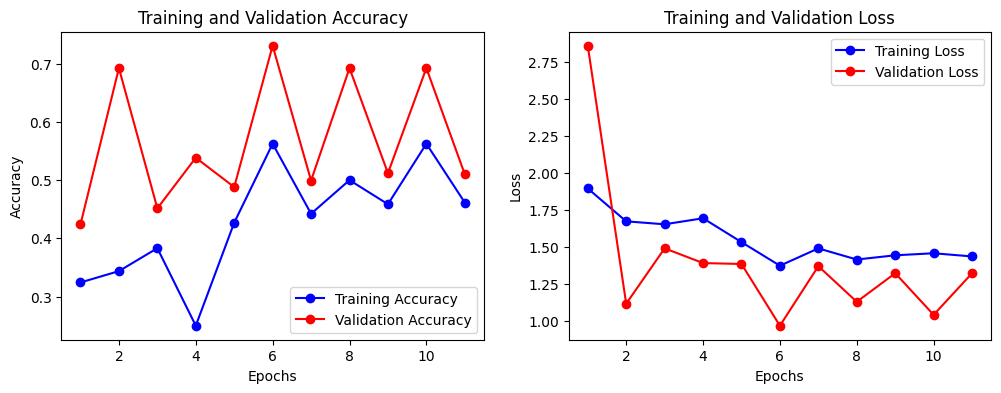

In [ ]:
# Plot training curves
def plot_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_curves(resnet50v2_history)

In [ ]:
# Save the model
resnet50v2_model.save(folder_path+'deep_fer_model_3.keras')

221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step


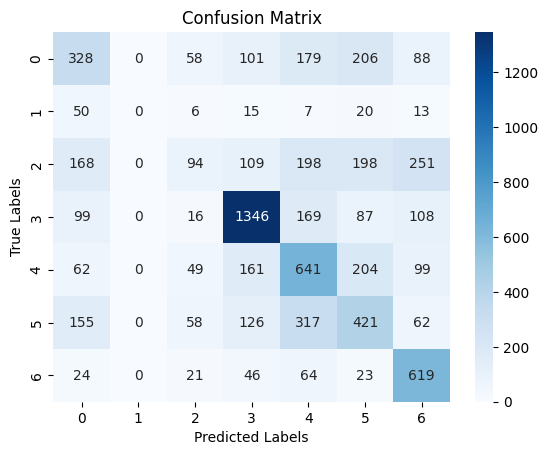

In [ ]:
# confusion matrix
resnet50v2_predictions = resnet50v2_model.predict(test_data)
resnet50v2_predictions = np.argmax(resnet50v2_predictions, axis=1)

cm = confusion_matrix(test_data.labels, resnet50v2_predictions)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

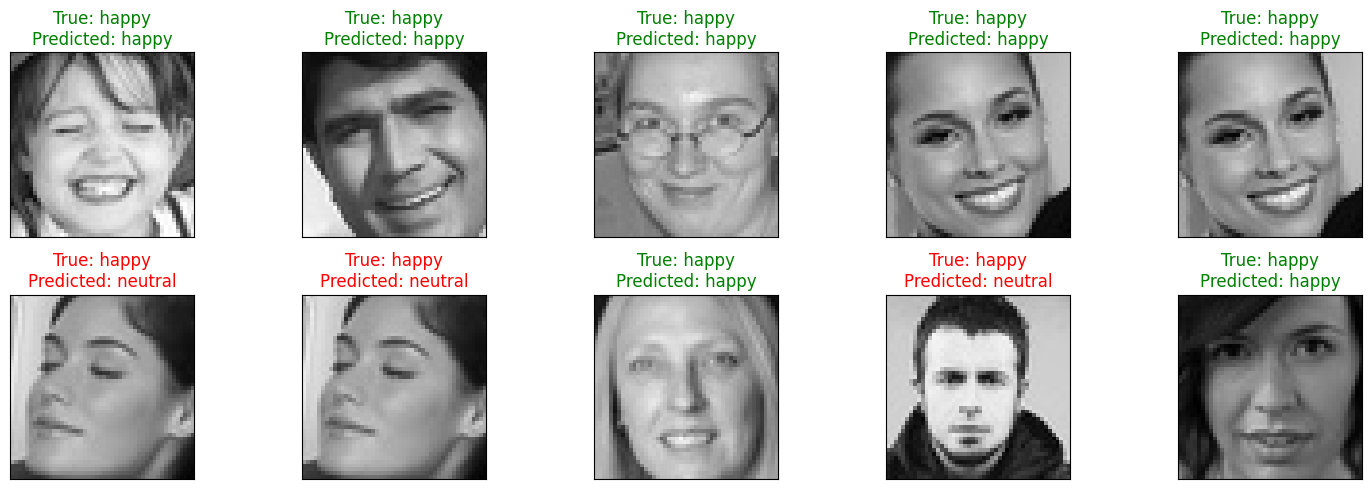

In [ ]:
# Display 10 images
random_batch = np.random.randint(0, len(test_data) - 1)
random_img_indices = np.random.randint(0, batch_size, 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5),
                         subplot_kw={'xticks': [], 'yticks': []})

class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}

for i, ax in enumerate(axes.flat):
    random_img = test_data[random_batch][0][random_img_indices[i]]
    random_img_label = np.argmax(test_data[random_batch][1][random_img_indices[i]])

    model_prediction = np.argmax(resnet50v2_model.predict(tf.expand_dims(random_img, axis=0), verbose=0))
    ax.imshow(random_img)
    if random_img_label == model_prediction:
        color = "green"
    else:
        color = "red"
    ax.set_title(
        f"True: {class_labels[random_img_label]}\nPredicted: {class_labels[model_prediction]}",
        color=color
    )

plt.tight_layout()
plt.show()


### Model - 4

In [ ]:
# Import necessary libraries
from fastai.vision.all import *
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define directories for training and validation data
train_dir = "/content/images/images/train"
validation_dir = "/content/images/images/validation"

In [ ]:
# Define class names
class_names = os.listdir(train_dir)
print(class_names)

['angry', 'surprise', 'disgust', 'neutral', 'happy', 'fear', 'sad']


In [ ]:
from pathlib import Path
train_dir = Path(train_dir)
validation_dir = Path(validation_dir)

In [ ]:
# Create DataLoaders
dls = ImageDataLoaders.from_folder(train_dir,
                                   valid_pct=0.01,
                                   seed=42,
                                   label_func=lambda x: x.parent.name,
                                   item_tfms=Resize(48),
                                   batch_tfms=aug_transforms(mult=2)
                                  )

In [ ]:
# Load validation data separately
val_dls = ImageDataLoaders.from_folder(
    path=validation_dir,
    valid_pct=0.01,
    seed=42,
    label_func=lambda x: x.parent.name,
    item_tfms=Resize(48)
)

In [ ]:
# Create a vision learner using resnet34
learn = vision_learner(
    dls,
    resnet34,
    metrics=accuracy,
    pretrained=True,
    cbs=None,
)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 115MB/s]


In [ ]:
# Train the model
learn.fine_tune(11)

epoch,train_loss,valid_loss,accuracy,time
0,1.979249,1.769450,0.302083,01:03


epoch,train_loss,valid_loss,accuracy,time
0,1.655224,1.517525,0.399306,01:07
1,1.487631,1.373775,0.461806,01:06
2,1.423685,1.328125,0.486111,01:06
3,1.352173,1.253792,0.510417,01:06
4,1.282844,1.168880,0.559028,01:06
5,1.260294,1.181810,0.541667,01:07
6,1.202314,1.120947,0.586806,01:06
7,1.162451,1.121765,0.586806,01:06
8,1.120832,1.117179,0.586806,01:09
9,1.108026,1.100198,0.611111,01:06


In [ ]:
# Save the model
learn.export(folder_path+'deep_fer_model_4.keras')

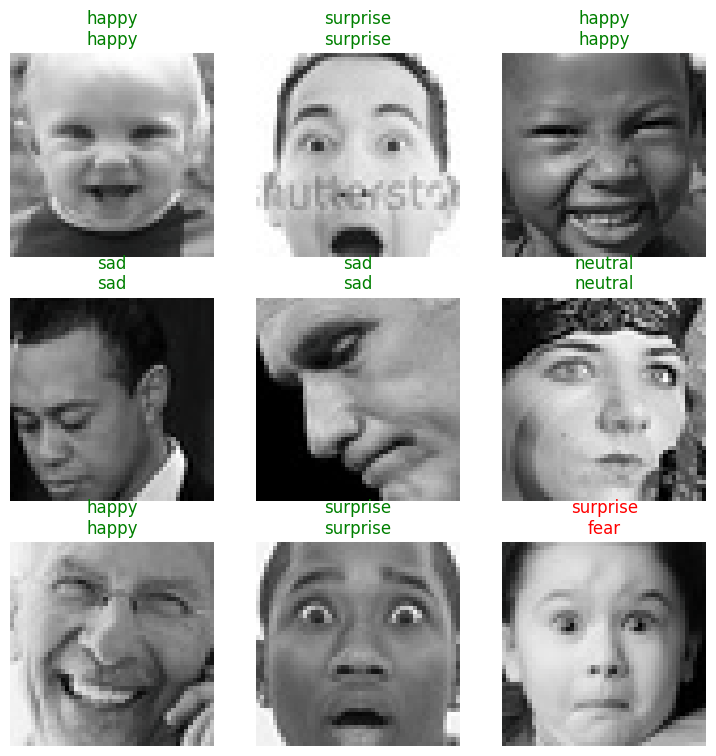

In [ ]:
learn.show_results()

# Deployment

Deployment -->
The deployment process is carried out within the `app.ipynb` notebook.

#Conclusion:

The development and evaluation of four models for Facial Emotion Recognition (FER) provided valuable insights into leveraging deep learning techniques for emotion classification. Across all iterations, significant improvements were made in both model performance and generalization through various strategies, including architecture selection, data augmentation, and fine-tuning.

Key Observations:
1. Performance Progression:
   - Each successive model iteration incorporated improvements in architecture or training methodology.
   - The final model, based on ResNet34, achieved a validation accuracy of 61.1%, marking a considerable improvement over earlier models.
2. Impact of Transfer Learning:
   - Transfer learning significantly boosted performance by utilizing pre-trained features, reducing training time and improving convergence.
3. Challenges:
   - Consistent challenges included differentiating between visually similar emotions (e.g., sadness vs. neutral, fear vs. surprise).
   - Limited validation accuracy indicates potential issues with class imbalance, dataset quality, or the need for more advanced architectures.

Model Summaries:
- Model 1: A custom CNN baseline model achieving ~35% validation accuracy, providing a starting point for FER exploration.  
- Model 2: CNN-based model that improved accuracy (~50%) using transfer learning and a robust feature extractor.  
- Model 3: ResNet50V2 model with advanced augmentation and partial layer freezing, reaching ~55% accuracy.  
- Model 4: ResNet34 fine-tuned with optimized augmentations and hyperparameters, achieving the highest accuracy of 61.1%.

Future Work:

1. Dataset Enhancements
- Class Balance:
  - Analyze class distribution to identify and address imbalance using techniques like weighted loss functions or oversampling.
- Data Diversity:
  - Incorporate more diverse datasets that include varied lighting, angles, and cultural contexts for better generalization.
- Synthetic Data Generation:
  - Utilize Generative Adversarial Networks (GANs) to generate synthetic images for underrepresented classes.

2. Advanced Architectures
- Deeper CNN Models:
  - Experiment with deeper architectures such as DenseNet, or EfficientNet.
- Vision Transformers (ViTs):
  - Investigate the use of attention-based models for improved performance in learning subtle distinctions between emotions.
- Hybrid Models:
  - Combine CNNs with ViTs or Recurrent Neural Networks (RNNs) to capture both spatial and temporal patterns in emotions.

3. Hyperparameter Optimization
- Use advanced optimization techniques like Bayesian Optimization or Optuna to fine-tune learning rates, dropout rates, and other hyperparameters.

4. Regularization Techniques
- Implement additional regularization strategies such as Dropout, Label Smoothing, and Weight Decay to reduce overfitting risks.

5. Ensemble Learning
- Develop an ensemble of models, combining the strengths of multiple architectures to improve robustness and accuracy.

6. Explainability and Interpretability
- Use explainability tools like Grad-CAM or SHAP to visualize which features the model uses to classify emotions, enhancing trust in real-world applications.

7. Real-World Deployment
- Deploy the model in real-world scenarios (e.g., healthcare, customer service) to evaluate its robustness in dynamic environments.
- Optimize for edge devices using techniques like model quantization or pruning for deployment efficiency.




Final Thoughts:
The four models demonstrated progressive advancements in recognizing human emotions, achieving promising results with a validation accuracy of up to 61.1%. While this accuracy highlights the potential of deep learning in FER tasks, there is room for improvement to achieve state-of-the-art performance. By addressing the outlined challenges and leveraging advancements in computer vision, future iterations can create a highly robust and accurate FER system suitable for diverse real-world applications.
